# Visualization using Matplotlib

In this notebook, we will learn to use Matplotlib for visualization. We use the data of immigration from various countries to Canada from 1980 to 2013.

<br> 1. [Data Wrangling](#data_wrangling)
<br> 2. [Line Plot](#line_plot)
<br> 3. [Area Plot](#area_plot)
<br> 4. [Histogram](#histogram)
<br> 5. [Bar Chart](#bar_chart)
<br> 6. [Pie Chart](#pie_chart)
<br> 7. [Box Plot](#box_plot)
<br> 8. [Subplots: Multiple plots](#subplot)
<br> 9. [Scatter Plot](#scatter_plot)
<br> 10. [Bubble Plot](#bubble_plot)
<br> 11. [Waffle Chart](#waffle_chart)
<br> 12. [Word Cloud](#word_cloud)
<br> 13. [Regression Plot](#regression_plot)
<br> 14. [Folium Map](#folium)
<br> 15. [Choropleth Map](#choropleth)

Let's first import the required packages

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches      # needed for waffle charts
import seaborn as sns
from PIL import Image                      # coverting images into arrays

pd.set_option('display.max_columns', None)  

<a id = 'data_wrangling'></a>
## 1. Data Wrangling 

Our first step is to import the data and clean it.

In [2]:
df_can = pd.read_excel('Canada.xlsx', 
                       sheet_name = 'Canada by Citizenship', 
                       skiprows = range(20), 
                       skipfooter = 2)
df_can.shape

(195, 43)

In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


The default type for index and columns is not list. To get them as lists, we have to use tolist() method.

In [4]:
print(type(df_can.index), type(df_can.columns))
print(type(df_can.index.tolist()), type(df_can.columns.tolist()))

<class 'pandas.core.indexes.range.RangeIndex'> <class 'pandas.core.indexes.base.Index'>
<class 'list'> <class 'list'>


Let's drop unnecessary columns, rename some columns with better names, and create a new column for total number of immigrants from each country

In [5]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis = 1, inplace = True)
df_can.rename(columns = {'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, 
              inplace = True)
df_can['Total'] = df_can.sum(axis = 1)

Now, lets set the country column as index, so as to access data using country names

In [6]:
df_can.set_index('Country', inplace = True)

In [7]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


Column names are integers (1980, 1981......). Thus, we convert them into strings, so that we don't confuse names (which are integers) with positional index.

In [8]:
df_can.columns = list(map(str, df_can.columns))

Also, create a list, consisting of the year range 1980 - 2013 (str type)

In [9]:
years = list(map(str, range(1980, 2014)))
years[:5]

['1980', '1981', '1982', '1983', '1984']

<a id = 'line_plot'></a>
## 2. Line Plot

Lets plot annual immigration from Haiti

In [10]:
haiti = df_can.loc['Haiti', years]  # obtain the data in all year columns from 1980-2013 
print(type(haiti))                  # corresponding to 'Haiti' row

<class 'pandas.core.series.Series'>


In [11]:
haiti

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
1985    1321
1986    1753
1987    2132
1988    1829
1989    2377
1990    2379
1991    2829
1992    2399
1993    3655
1994    2100
1995    2014
1996    1955
1997    1645
1998    1295
1999    1439
2000    1631
2001    2433
2002    2174
2003    1930
2004    1652
2005    1682
2006    1619
2007    1598
2008    2491
2009    2080
2010    4744
2011    6503
2012    5868
2013    4152
Name: Haiti, dtype: object

In [12]:
haiti.index = haiti.index.map(int)  # change the index values of haiti to type int for plotting

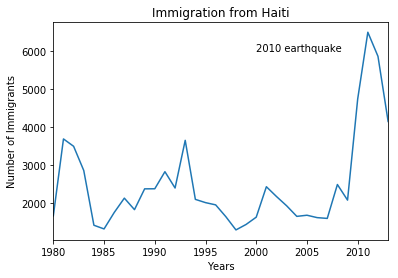

In [13]:
haiti.plot(kind = 'line', figsize = (6,4))
plt.title('Immigration from Haiti')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.text(2000, 6000, '2010 earthquake')
plt.show()

Now, lets plot annual immigration from India and China

In [14]:
df_ci = df_can.loc[['India', 'China'], years]
print(type(df_ci))

<class 'pandas.core.frame.DataFrame'>


In [15]:
df_ci

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


In [16]:
df_ci = df_ci.transpose()
df_ci.index = df_ci.index.map(int)

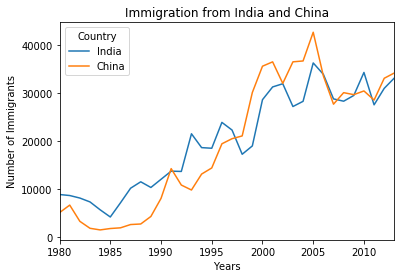

In [17]:
df_ci.plot(kind = 'line', figsize = (6,4))
plt.title('Immigration from India and China')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show()

<a id = 'area_plot'></a>
## 3. Area Plot

Area plot is commonly used to represent cumulated totals using numbers or percentage over time. It is commonly used when comparing two or more quantities.

Now, we will plot an area plot of the top 5 countries, contributing the  most number of immigrants to Canada. For this purpose, we sort the dataframe according to the 'Total' column, and then create a new dataframe consisting of top 5 rows

In [18]:
df_can.sort_values('Total', ascending = False, axis = 0, inplace = True)
df_top5 = df_can.head(5)
df_top5 = df_top5[years].transpose()      # select the years columns only and take the transpose
df_top5.index = df_top5.index.map(int)

In [19]:
df_top5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


First, we plot using the scripting layer (i.e. matplotlib.pyplot interface)
 - Area plots are stacked by default. To produce an unstacked plot, we pass stacked = False
 - Parameter alpha (0-1) is transparency parameter for unstacked area plots (default value is 0.5)
 - To produce stacked area plot, each column must be either all positive or all negative values

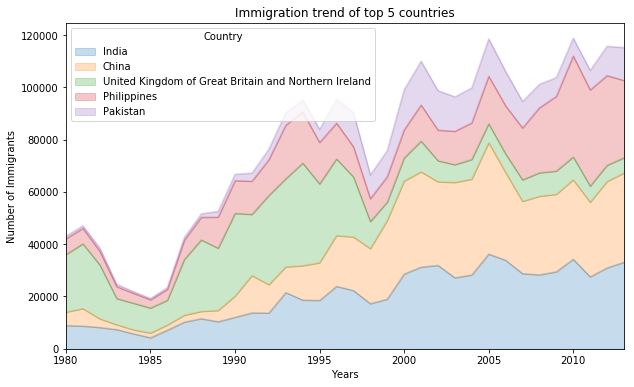

In [20]:
df_top5.plot(kind = 'area', alpha = 0.25, stacked = True, figsize = (10,6))
plt.title('Immigration trend of top 5 countries')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show()

Stacked area plots are like a evolving pie-chart, where we can plot the contribution from each country as a function of year. In a pie-chart, we draw the fraction of immigrants from each of the countries, for any particular year. Stacked plots are like pie-chart only, but instead of fraction, we represent their contribution by their absolute number, as we are not restricted by a circle. Thus, we can visualize the immigration from each country and total immigration, as a function of year.

Now we plot using the artist layer (object oriented method): using an Axes instance from Matplotlib

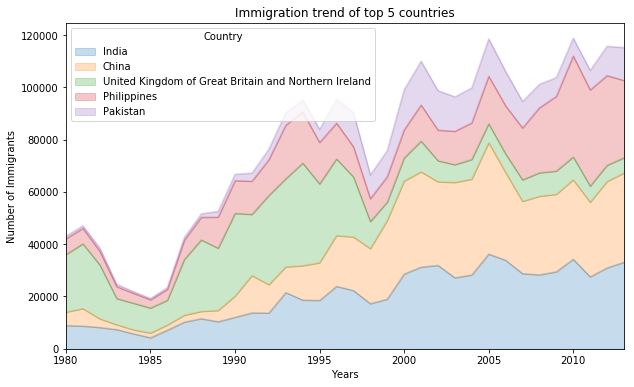

In [21]:
# we use an Axes instance of our current plot and store it in variable ax
ax = df_top5.plot(kind = 'area', alpha = 0.25, stacked = True, figsize = (10,6))

ax.set_title('Immigration trend of top 5 countries')
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigrants')
plt.show()

<a id = 'histogram'></a>
## 4. Histogram

A histogram is a way of representing the frequency distribution of a variable. Lets plot a histogram of the number of new immigrants from various countries to Canada in 2013

In [22]:
count, bin_edges = np.histogram(df_can['2013'])

print(bin_edges)
print(count)

[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]
[178  11   1   2   0   0   0   0   1   2]


The function np.histogram() returns the bin ranges (bin_edges) and frequency count (count). It bins the column '2013' into number of bins desired (default = 10).

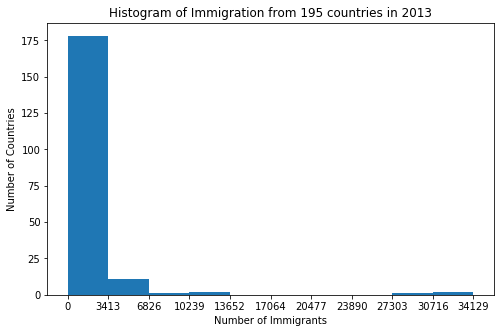

In [23]:
df_can['2013'].plot(kind = 'hist', xticks = bin_edges, figsize = (8,5)) # bin_edges as xticks
plt.title('Histogram of Immigration from 195 countries in 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')
plt.show()

Now, let's plot multiple histograms on the same plot. Lets plot immigration distribution for Denmark, Norway and Sweden for years 1980 - 2013

In [24]:
df_dns = df_can.loc[['Denmark', 'Norway', 'Sweden'], years]
df_dns = df_dns.transpose()
df_dns.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


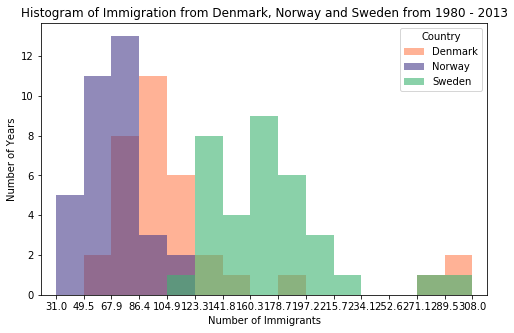

In [25]:
count, bin_edges = np.histogram(df_dns, 15)
xmin = bin_edges[0] - 10                     # xmin, xmax to control the x-range
xmax = bin_edges[-1] + 10

colorList = ['coral', 'darkslateblue', 'mediumseagreen']

df_dns.plot(kind = 'hist', 
            figsize = (8,5), 
            bins = 15, 
            alpha = 0.6, 
            xticks = bin_edges, 
            color = colorList, 
            xlim = (xmin, xmax), 
            stacked = False)

plt.title('Histogram of Immigration from Denmark, Norway and Sweden from 1980 - 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Years')
plt.show()

If we do not want the plots to overlap each other in above histogram, we can stack them using stacked = True argument (Give it a try !)

<a id = 'bar_chart'></a>
## 5. Bar Chart

A bar chart is a way of representing data where the length of the bars represent the magnitude/size of the feature

First, let try a vertical bar chart: plot the number of immigrants from Iceland to Canada from 1980-2013

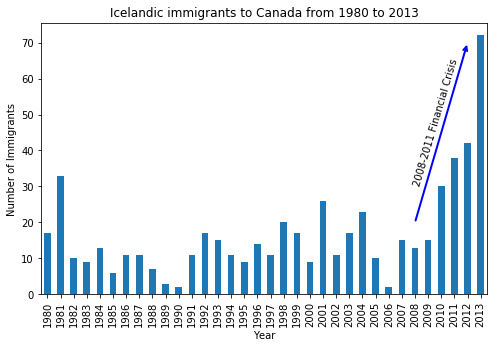

In [26]:
df_ice = df_can.loc['Iceland', years]
df_ice.plot(kind = 'bar', figsize = (8,5), rot = 90)
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic immigrants to Canada from 1980 to 2013')
plt.annotate('', xy = (32,70), xytext = (28, 20), xycoords = 'data', # annotate arrow
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw = 2))
plt.annotate('2008-2011 Financial Crisis', xy = (27.8,30), rotation = 73.5, 
             va = 'bottom', ha = 'left')  # annotate text
plt.show()

Now, lets try horizontal bar charts: plot the total number of immigrants to Canada from the top 15 countries

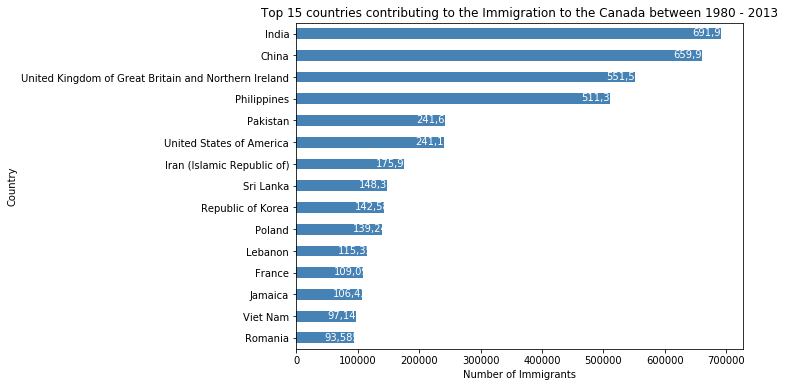

In [27]:
df_can.sort_values('Total', ascending = True, axis = 0, inplace = True)
df_top15 = df_can['Total'].tail(15)
df_top15.plot(kind = 'barh', figsize = (8, 6), color = 'steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 countries contributing to the Immigration to the Canada between 1980 - 2013')

for index, value in enumerate(df_top15):        # annotate value labels to each country
    label = format(int(value), ',')             # format int with commas
    plt.annotate(label, xy = (value-47000, index-0.10), color = 'white')
plt.show()

<a id = 'pie_chart'></a>
## 6. Pie Chart

A pie chart is a circular graphic that displays numeric proportions by dividing a circle (pie) into proportional slices. Lets plot a pie chart to explore the proportion of new immigrants grouped by continents for the entire duration of 1980-2013

We apply the pandas groupby method to extract the desired data:
 - split: group method first splits the dataframe into separate groups according to the criteria
 - apply: then a function is applied on each group independently
 - combine: then the results are combined into a data structure
 
We group by 'Continents' criteria, apply sum() method on each group, and then combine to get data Continent wise

In [28]:
df_continents = df_can.groupby('Continent', axis = 0).sum()

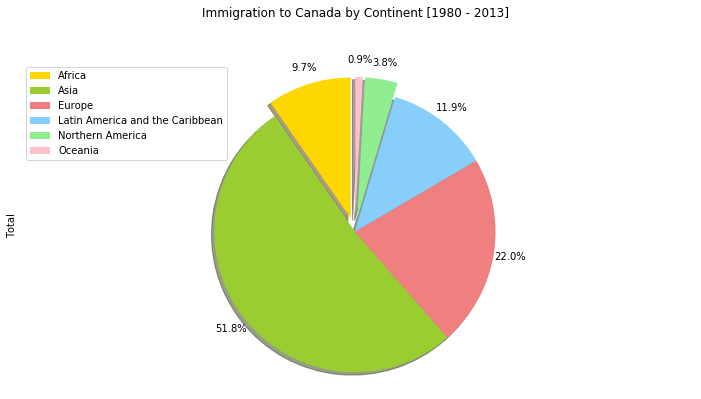

In [29]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

df_continents['Total'].plot(kind = 'pie',
    figsize = (12,6),
    autopct = '%1.1f%%',    # string/function used to label the wedges with numeric value
    startangle = 90,        # rotates the start of the pie chart by angle degrees
    shadow = True,          # draws a shadow beneath the pie (to give a 3D feel)
    labels = None,          # turns off labels on pie chart
    pctdistance = 1.12,     # distance from center, autopct text placed (in units of pie radius)
    colors = colors_list,   # we can pass in a custom set of colors for continents
    explode = explode_list) # distance by which to explode the wedges (in units of pie radius)

plt.title('Immigration to Canada by Continent [1980 - 2013]', y = 1.12)
plt.axis('equal')                                       # sets the piechart to look like a circle
plt.legend(labels = df_continents.index, loc = 'upper left')        # add legend
plt.show()

Note that the output of the groupby method is a groupby object. We can not use it further until we apply a function, eg sum()

In [30]:
print(type(df_can.groupby('Continent', axis = 0)))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


<a id = 'box_plot'></a>
## 7. Box Plot

A box plot is a way of statistically representing the distribution of the data through five main dimensions:
 - minimum: smallest number in the data set
 - first quartile: 25% of data points (sorted) are less than this value, middle number between minimum and median
 - second quartile (median): middle number of the sorted dataset
 - third quartile: 75% of the data points are less than this value, middle number between the median and maximum
 - maximum: highest number in the dataset

Inter Quartile Range (IQR): the range between first quartile and third quartile

Lets plot the box plot for the Japanese immigrants between 1980 - 2013

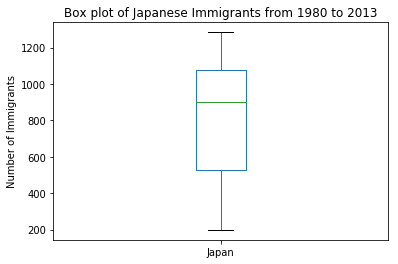

In [31]:
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.plot(kind = 'box', figsize = (6,4))
plt.title('Box plot of Japanese Immigrants from 1980 to 2013')
plt.ylabel('Number of Immigrants')
plt.show()

Here, we obtained the data as dataframe (instead of series) because some methods which we use below can be applied to dataframes only. One of the key benefits of box plots is comparing the distribution of multiple datasets. Lets compare the distribution of India and China immigration using box plots

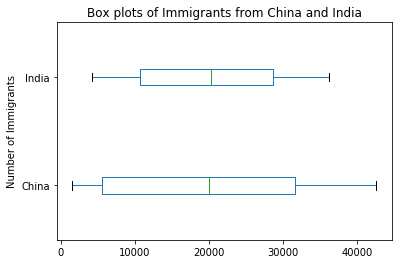

In [32]:
df_ci = df_can.loc[['China', 'India'], years].transpose()
df_ci.plot(kind = 'box', figsize = (6,4), vert = False)     # default is vertical box plots
plt.title('Box plots of Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.show()

In [33]:
df_ci.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


Now, lets do some advance plotting. Lets create a box plot to visualize the distribution of top 15 countries (based on total immigration) grouped by the decades, 1980s, 1990s, 2000s

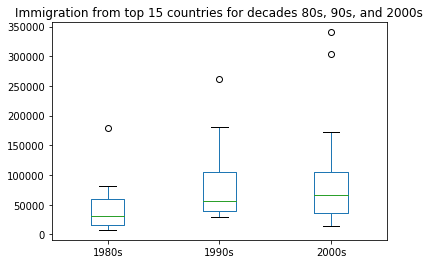

In [34]:
df_top15 = df_can.sort_values('Total', ascending = False, axis = 0).head(15)

years80s = list(map(str, range(1980, 1990)))     # create a list of all years in a decade
years90s = list(map(str, range(1990, 2000)))
years00s = list(map(str, range(2000, 2010)))

df80s = df_top15.loc[:, years80s].sum(axis = 1)  # create a series for each decade
df90s = df_top15.loc[:, years90s].sum(axis = 1)
df00s = df_top15.loc[:, years00s].sum(axis = 1)

df_decades = pd.DataFrame({'1980s':df80s, 
                           '1990s':df90s, 
                           '2000s':df00s})  # merge three series into a new dataframe

df_decades.plot(kind = 'box', figsize = (6,4))
plt.title('Immigration from top 15 countries for decades 80s, 90s, and 2000s')
plt.show()

Box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:
 - larger than Q3 by atleast 1.5 times the interquartile range (IQR)
 - smaller than Q1 by atleast 1.5 times the interquartile range (IQR)

<a id = 'subplot'></a>
## 8. Subplots: multiple plots within the same figure

To visualize multiple plots together, we can create a figure (overall canvas) and divide it into subplots. With subplots, we usually work with the artist layer instead of the scripting layer
 
Typical syntax:
 - fig = plt.figure(): create figure
 - ax = fig.add_subplot(nrows, ncols, plot_number): create subplots
 - nrows and ncols are used to notionally split the figure into $nrows*ncols$ subaxes
 - plot_number identifies subplots. It starts at 1, increments across rows first, with maximum  value nrows*ncols
 
Lets plot box-plot and line-plot of immigration from China and India, side by side on the same figure

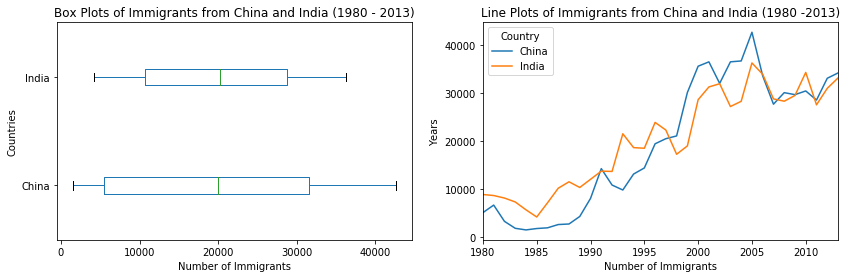

In [35]:
df_ci = df_can.loc[['China', 'India'], years].transpose()

fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)    # add subplot 1 (one row, two columns, first plot)
ax1 = fig.add_subplot(1,2,2)    # add subplot 2 (one row, two columns, second plot)

df_ci.plot(kind = 'box', figsize = (14,4), vert = False, ax = ax0)  # subplot 1: box plot
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

df_ci.plot(kind = 'line', figsize = (14,4), ax = ax1)               # subplot 2: line plot
ax1.set_title('Line Plots of Immigrants from China and India (1980 -2013)')
ax1.set_xlabel('Number of Immigrants')
ax1.set_ylabel('Years')

plt.show()

<a id = 'scatter_plot'></a>
## 9. Scatter Plot

A scatter plot is a useful method of comparing variables against each other. The data in a scatter plot is considered to express a trend: we can mathematically understand this relationship using tools like regression or other methods.

Lets visualize the trend of total immigration to Canada for the years 1980-2013 using scatter plots.

In [36]:
df_yt = pd.DataFrame(df_can[years].sum(axis = 0))   # performing sum on all years, gives a
                                                    # series which we convert to a dataframe

df_yt.index = map(int, df_yt.index)  # change the years to type int (useful for regression later)
df_yt.reset_index(inplace = True)    # reset the index

df_yt.columns = ['Year', 'Total']   # rename the columns
df_yt.head()

,Year,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Text(0, 0.5, 'Number of Immigrants')

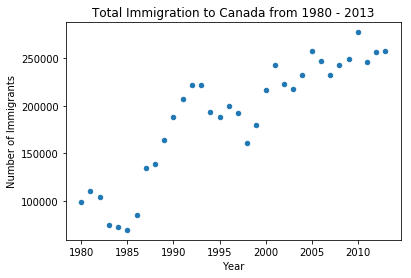

In [37]:
df_yt.plot(kind = 'scatter', x = 'Year', y = 'Total', figsize = (6,4))
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

We can clearly observe an upward trend: as the years go by, the total number of immigrants increase. We can mathematically analyze this upward trend using a regression line.

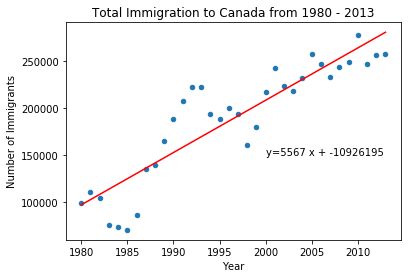

In [38]:
x = df_yt['Year']
y = df_yt['Total']
fit = np.polyfit(x, y, deg = 1) # fitting a linear line: deg = 1 (linear), 2 (quadratic)
fit                             # fit is an array with polynomial coefficients, highest powers first :
                                # fit [0] is slope and fit[1] is intercept in this example

df_yt.plot(kind = 'scatter', x = 'Year', y = 'Total', figsize = (6,4))
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.plot(x, fit[0]*x + fit[1], color = 'red')       # plot the line of best fit
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy = (2000, 150000))
plt.show()

<a id = 'bubble_plot'></a>
## 10. Bubble Plot

A bubble plot is a variation of the scatter plot that displays three dimensions of data (x,y,z). The datapoints are replaced with bubbles, with the size of the bubble determined by the third variable 'z' (known as weight).

Lets use bubble plot to compare the immigration from Argentina and Brazil (1980-2013) to understand the effect of Argentina's great depression (1998-2002)

In [39]:
df = df_can[years].transpose()         # transposed dataframe
df.index = map(int, df.index)          # cast the years (the index) to type int
df.index.name = 'Year'                 # abel the index: becomes column name when we reset index
df.reset_index(inplace = True)         # reset index to bring the Year in as a column
df.head()

Country,Year,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino,American Samoa,Tuvalu,Sao Tome and Principe,Vanuatu,Kiribati,Andorra,Nauru,Canada,Monaco,Maldives,Liechtenstein,Equatorial Guinea,Papua New Guinea,Samoa,Guinea-Bissau,Montenegro,Lesotho,Tonga,Qatar,Mozambique,Swaziland,Comoros,Cabo Verde,Luxembourg,Oman,"China, Macao Special Administrative Region",Malawi,Turkmenistan,Namibia,Democratic People's Republic of Korea,Botswana,Bahrain,Tajikistan,Slovenia,Central African Republic,Iceland,Brunei Darussalam,Gambia,Saint Kitts and Nevis,Suriname,Bahamas,United Arab Emirates,Estonia,Niger,Gabon,Mongolia,Antigua and Barbuda,Mauritania,Belize,Lao People's Democratic Republic,Cyprus,Seychelles,Malta,Djibouti,Chad,Zambia,Congo,Serbia,Paraguay,Kuwait,Burkina Faso,Georgia,Angola,Mali,Madagascar,Latvia,Norway,Kyrgyzstan,Lithuania,Dominica,Azerbaijan,Liberia,Finland,Benin,Yemen,Panama,Bolivia (Plurinational State of),Armenia,Sierra Leone,Uzbekistan,Saudi Arabia,Uganda,Togo,Denmark,Czech Republic,Costa Rica,The former Yugoslav Republic of Macedonia,Uruguay,Saint Lucia,Guinea,Libya,Austria,Spain,Sweden,Bhutan,Slovakia,State of Palestine,Cambodia,Rwanda,Barbados,Senegal,Honduras,Belarus,Croatia,Burundi,Côte d'Ivoire,Kazakhstan,Zimbabwe,Grenada,Thailand,Myanmar,"China, Hong Kong Special Administrative Region",Saint Vincent and the Grenadines,Nepal,New Zealand,Eritrea,Belgium,Dominican Republic,Nicaragua,Ecuador,Greece,United Republic of Tanzania,Indonesia,Singapore,Republic of Moldova,Switzerland,Mauritius,Albania,Cameroon,Hungary,Ireland,Kenya,Tunisia,Sudan,Guatemala,Argentina,Cuba,Fiji,Venezuela (Bolivarian Republic of),Chile,Bosnia and Herzegovina,Italy,Bulgaria,Australia,Malaysia,Democratic Republic of the Congo,Ghana,Netherlands,Japan,Brazil,Syrian Arab Republic,Turkey,Peru,Ethiopia,Jordan,Nigeria,South Africa,Somalia,Trinidad and Tobago,Ukraine,El Salvador,Afghanistan,Mexico,Russian Federation,Germany,Bangladesh,Israel,Algeria,Iraq,Colombia,Morocco,Egypt,Portugal,Guyana,Haiti,Romania,Viet Nam,Jamaica,France,Lebanon,Poland,Republic of Korea,Sri Lanka,Iran (Islamic Republic of),United States of America,Pakistan,Philippines,United Kingdom of Great Britain and Northern Ireland,China,India
0,1980,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,3,0,0,1,2,0,0,4,0,1,14,0,0,5,0,0,1,10,0,0,0,4,17,79,0,5,15,26,0,0,0,2,0,0,5,16,11,132,5,191,0,0,11,2,0,45,1,2,0,1,4,22,0,116,0,1,104,0,1,208,2,1,13,44,0,6,0,0,13,5,272,0,28,0,128,69,0,5,234,211,281,0,0,0,12,6,372,13,26,0,0,0,14,0,72,154,56,80,0,147,1,602,0,511,40,18,238,1065,635,186,241,0,806,306,1,9,205,781,291,58,20,114,368,306,632,103,1233,0,1820,24,702,786,15,172,1889,701,211,315,481,317,98,177,81,1026,7,958,0,110,16,409,0,1626,83,1403,80,262,266,325,612,4473,2334,1666,375,1191,3198,1729,1409,863,1011,185,1172,9378,978,6051,22045,5123,8880
1,1981,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,4,0,2,7,0,0,1,4,0,0,1,2,1,4,0,0,4,0,5,1,1,2,0,0,3,33,6,0,3,10,23,2,0,0,3,0,0,0,27,6,128,15,242,1,0,17,0,0,26,0,1,0,3,4,10,0,77,0,1,81,0,2,205,5,2,8,52,0,6,0,0,16,5,293,0,35,0,132,89,3,7,238,299,308,0,0,0,19,6,376,10,33,0,0,0,8,0,114,181,53,62,0,190,1,480,0,540,53,21,207,953,832,178,301,0,811,259,0,2,310,895,296,51,12,108,426,41,705,117,1069,0,2057,20,639,816,16,196,1858,756,220,419,874,456,59,160,60,1118,10,947,0,295,39,394,0,1977,84,1711,67,245,326,471,660,3486,2943,3692,438,1829,2634,2027,1119,2930,1456,371,1429,10030,972,5921,24796,6682,8670
2,1982,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,4,0,0,1,7,0,7,1,2,2,2,0,0,6,0,5,3,3,1,0,0,1,10,8,1,0,21,38,2,0,1,2,0,0,3,13,16,84,3,153,1,1,11,1,0,32,8,3,0,6,7,13,0,106,0,0,94,0,2,170,4,1,14,42,0,7,0,1,17,2,299,0,42,0,146,133,3,9,201,260,222,0,0,0,26,8,299,9,30,0,0,0,10,0,102,231,113,46,0,202,6,364,0,519,104,27,184,897,621,252,337,0,634,353,0,16,397,707,221,55,11,113,626,94,814,174,1078,0,1480,12,484,813,17,98,1852,598,192,409,706,401,54,155,58,781,7,972,0,882,39,491,0,3062,86,1334,71,260,360,447,755,2432,3575,3498,583,2162,2661,2219,1159,5881,1572,290,1822,9074,1201,5249,20620,3308,81

Now we create the normalized weights: we use min-max feature scaling to bring all values into the range [0,1]

In [40]:
norm_brz = (df['Brazil'] - df['Brazil'].min())/(df['Brazil'].max() - df['Brazil'].min())
norm_arg = (df['Argentina'] - df['Argentina'].min())/(df['Argentina'].max() - df['Argentina'].min()) 

To plot two different scatter plots in one plot, we can include the axes of one plot into the other by passing it via the ax parameter. We pass in the weights using the s parameter. Given that the normalized weights are between 0-1, they wont be visible on the plot, thus we
 - multiply weights by 200 to scale it up on the graph, and
 - add 1 to compensate for the minimum value (which has 0 weight, 0*2000 = 0)

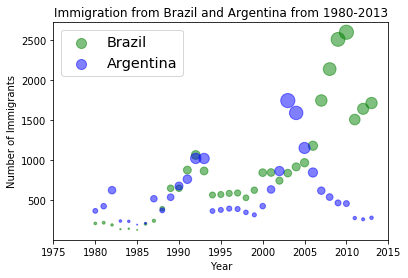

In [41]:
ax0 = df.plot(kind = 'scatter',                # scatter plot for Brazil
              x = 'Year',
              y = 'Brazil',
              figsize = (6,4),
              alpha = 0.5,
              color = 'green',
              s = norm_brz*200 + 1,
              xlim = (1975, 2015))

ax1 = df.plot(kind = 'scatter',                # scatter plot for Argentina
              x = 'Year',
              y = 'Argentina',
              alpha = 0.5,
              color = 'blue',
              s = norm_arg*200 + 1,
              ax = ax0)

ax0.set_title('Immigration from Brazil and Argentina from 1980-2013')
ax0.set_ylabel('Number of Immigrants')
ax0.legend(['Brazil', 'Argentina'], loc = 'upper left', fontsize = 'x-large')
plt.show()

<a id = 'waffle_chart'></a>
## 11. Waffle Chart

A waffle chart is a visualization that is normally created to display progress towards goals. Unlike R, waffle charts are not built into any of the Python visualization libraries. Here, we will learn to create them from scratch.

Lets create waffle chart of total immigration from Denmark, Norway and Sweden from 1980 to 2013:

In [42]:
df_dns = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

sum_total = sum(df_dns['Total'])
category_proportion = [(float(value)/sum_total) for value in df_dns['Total']]

for i, proportion in enumerate(category_proportion):
    print(df_dns.index.values[i] + ':' + str(proportion))

Denmark:0.32255663965602777
Norway:0.1924094592359848
Sweden:0.48503390110798744


In [43]:
width = 40
height = 10
total_tiles = width * height        # determine the overall size of the waffle chart

tiles_category = [round(proportion * total_tiles) for proportion in category_proportion]

for i, n_tiles in enumerate(tiles_category):
    print(df_dns.index.values[i] + ':' + str(n_tiles))

Denmark:129
Norway:77
Sweden:194


In [44]:
waffle_chart = np.zeros((height, width))    # initialize waffle chart as empty matrix
category_index = 0
tile_index = 0

for col in range(width):                    # populate the waffe chart matrix
    for row in range(height):
        
        tile_index += 1
        
        if tile_index > sum(tiles_category[0:category_index]):
            category_index += 1
            
        waffle_chart[row, col] = category_index

<Figure size 432x288 with 0 Axes>

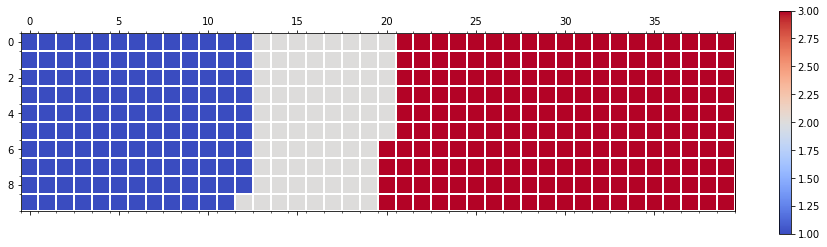

In [45]:
fig = plt.figure()                          # instantiate a new figure object
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)  # use matshow to display the waffle chart
plt.colorbar()

ax = plt.gca()                                                  # get the axis 
ax.set_xticks(np.arange(-0.5, (width), 1), minor = True)        # set minor ticks
ax.set_yticks(np.arange(-0.5, (height), 1), minor = True)
ax.grid(which = 'minor', color = 'w', 
        linestyle = '-', linewidth = 2)         # add gridlines based on minor ticks
plt.xticks()
plt.yticks()

plt.show()

<a id = 'word_cloud'></a>
## 12. Word Cloud

In word clouds (also known as text clouds, tag clouds), the more a specific word appears in a text, the bigger and bolder it appears in the word cloud.

In [46]:
from wordcloud import WordCloud, STOPWORDS

In [47]:
alice_novel = open('alice.txt', 'r').read()

In [48]:
stopwords = set(STOPWORDS)    # using the function set to remove any redundant stopwords
stopwords.add('said')         # we add 'said' to stopwords to remove 'said' from wordcloud 
                              # an example of how to remove desired words

In [49]:
alice_mask = np.array(Image.open('alice_mask.png')) # passing this alice_mask to the WordCloud
                                        # to generate the wordcloud in the form of the figure

In [50]:
# instantiate a word cloud object (we use first 2000 words only)
alice_wc = WordCloud(background_color = 'white', 
                     max_words = 2000, 
                     mask = alice_mask, 
                     stopwords = stopwords)

alice_wc.generate(alice_novel)          # generate the word cloud

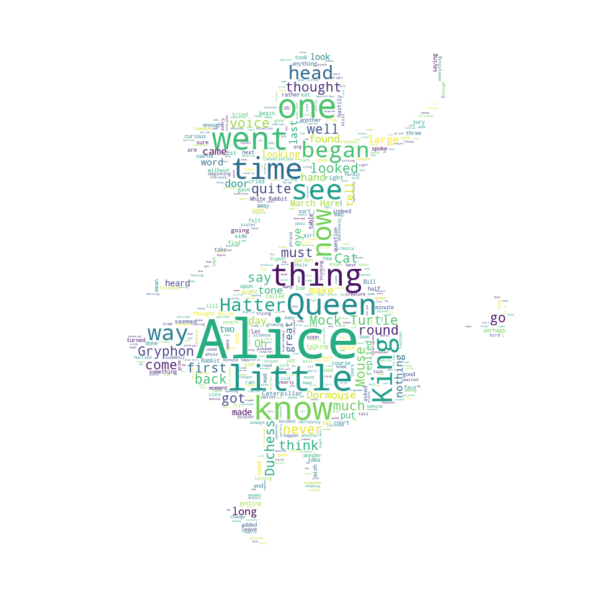

In [51]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(12)
plt.imshow(alice_wc, interpolation = 'bilinear')        # display the word cloud
plt.axis('off')
plt.show()

<a id = 'regression_plot'></a>
## 13. Regression Plot

We use seaborn library to create regression lines and fits. Lets use seaborn regression to understand the trend of total immigration to Canada for the years 1980-2013 (earlier we did this using scatter plot and explicit fitting)

In [52]:
df_yt = pd.DataFrame(df_can[years].sum(axis = 0))   # performing sum on all years give a, 
                                                    # series which we convert to dataframe

df_yt.index = map(float, df_yt.index)   # change the years to type float (useful for regression )
df_yt.reset_index(inplace = True)       # reset the index
df_yt.columns = ['Year', 'Total']       # rename the columns

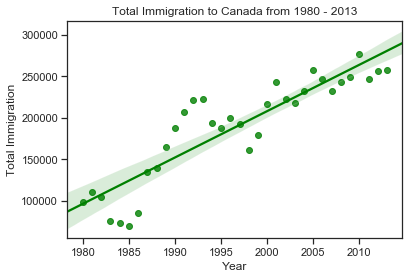

In [53]:
plt.figure(figsize = (6,4))
sns.set(font_scale = 1.0)    # controls the font size of tick mark labels, title, and x, y labels
sns.set_style('ticks')       # change background to white background

ax = sns.regplot(x = 'Year', y = 'Total', data = df_yt, color = 'green') # regression plot
ax.set(xlabel = 'Year', ylabel = 'Total Immigration')                    # adding x and y labels
ax.set_title('Total Immigration to Canada from 1980 - 2013')             # adding title
plt.show()

<a id = 'folium'></a>
## 14. Folium Map

Folium library was developed for the sole purpose of visualizing geospatial data.

In [54]:
import folium
                                                     
world_map = folium.Map(            # creating a folium map object
    location = [56.130, -106.35],  # location[latitude, longitude] specifies the center of map
    zoom_start = 4)                # zoom_start specifies initial zoom level

world_map

In [55]:
# stamen-toner map (high contrast black and white maps) :
# perfect for data mashups and exploring river meanders and coastal zones

world_map = folium.Map(location = [56.130, -106.35], zoom_start = 4, tiles = 'Stamen Toner')
world_map

In [56]:
# stamen-terrain: these map feature hill shading and natural vegetation colors

world_map = folium.Map(location=[56.130, -106.35], zoom_start = 4, tiles = 'Stamen Terrain')
world_map

In [57]:
# mapbox bright: these maps are similar to the default style except that borders are invisible with a low zoom level
# also, country name is shown in english (unlike default style where it is in native language)

world_map = folium.Map(tiles = 'Mapbox Bright')
world_map

Maps with markers: lets visualize the crime locations in the city of San Francisco.

In [58]:
df_incidents = pd.read_csv('crime_incidents.csv')

limit = 100
df_incidents = df_incidents.iloc[0:limit, :]     # we limit our dataframe to first 100 rows

latitude = 37.77
longitude = -122.42
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)
sanfran_map

Now, lets superimpose the locations of the crimes onto the map. To do this, first we create a feature group with its own features and style and then add to the sanfran map

In [59]:
incidents = folium.map.FeatureGroup()  # instantiate a feature group for incidents in dataframe

for lat, lng in zip(df_incidents.Y, df_incidents.X): # loop through crimes and add to incidents
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius = 5,                             # size of the circle markers
            color = 'yellow',
            fill = True,
            fill_color = 'blue',
            fill_opacity = 0.6
        )
    )
    
sanfran_map.add_child(incidents)                     # add incidents to map

sanfran_map

Lets add some pop-up text (category of the crime in this case) that would get displayed when we hover over a marker

In [60]:
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup = label).add_to(sanfran_map)
    
sanfran_map.add_child(incidents)                # add incidents to map

sanfran_map

If one finds these maps with markers too crowded, one can simply avoid these markers and just add the text to the cirlce markers :

In [61]:
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
        [lat, lng],
        radius = 5,                             # size of the circle markers
        color = 'yellow',
        fill = True,
        popup = label,
        fill_color = 'blue',
        fill_opacity = 0.6
    ).add_to(sanfran_map)

sanfran_map

<a id = 'choropleth'></a>
## 15. Choropleth Map

In choropleth maps, areas are shaded/patterned in proportion to the value of the variable (example : population density, per-capita income). Let's create a choropleth map of the world depicting immigration from various countries to Canada

In [62]:
df_can.reset_index(inplace = True)

To create a choropleth map, a GeoJSON file is required that defines the areas/boundaries of the state, county or country that we are interested in. The 'world_countries.json' file defines the boundaries of all world countries

Lets create a world map centered around 0,0 (latitude, longitude) using MapBox bright style

In [63]:
world_geo = r'world_countries.json'
world_map = folium.Map(location = [0, 0],        # create a plain world map
                       zoom_start = 2, 
                       tiles = 'Mapbox Bright') 

Now we create a choropleth map using choropleth method 

In [64]:
world_map.choropleth(
    geo_data = world_geo,               # geo json file
    data = df_can,                      # the dataframe
    columns = ['Country', 'Total'],     # columns in dataframe used to create choropleth map
    key_on = 'feature.properties.name', # key in GeoJSON file that contains countries name
    fill_color = 'YlOrRd',              # here, key 'name' contains name of countries
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'Immigratio to Canada'
)

world_map

/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
